In [62]:
import sklearn as sk
import pandas as pd
import matplotlib as mp

In [63]:
from sklearn.datasets import load_breast_cancer

In [64]:
data = load_breast_cancer()

In [65]:
label_names = data['target_names']
labels =data['target']
feature_names = data['feature_names']
features = data['data']

In [66]:
print(label_names)
print(labels[0])
#the malignant means no cancer and equals 0, the bengign means a cancer and equals 1

['malignant' 'benign']
0


In [67]:
print(feature_names)
print()
print(features[0])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [68]:
df = pd.DataFrame(data = data.data, columns = data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [69]:
from sklearn.model_selection import train_test_split

In [70]:
#spliting the dataset for training and testing
train, test, train_labels, test_labels = train_test_split(features,labels,test_size = 0.40, random_state = 42)

In [71]:
#Build the Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [72]:
#Initilize the decision tree classifier 
dtc = DecisionTreeClassifier()

#train the classifier on the training set
dtc.fit(train, train_labels)

DecisionTreeClassifier()

In [73]:
#make prediction on the test data
perd = dtc.predict(test)

In [74]:
#calcualt the accuracy
accuracy = accuracy_score(test_labels, perd)
print("The Accuracy=", accuracy)

The Accuracy= 0.9122807017543859


In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve

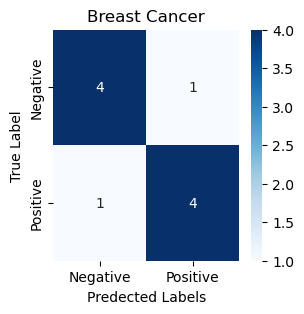

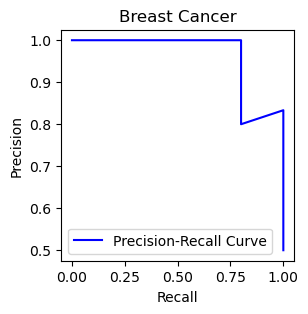

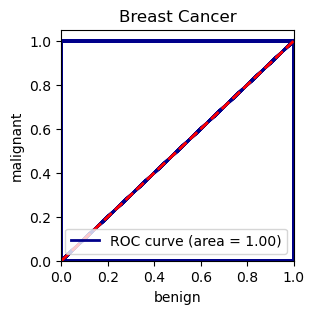

In [85]:
# Function to plot precision-recall curve
def plot_precision_recall_curve(true, y_scores):
    precision, recall, _ = precision_recall_curve(true, y_scores)
    plt.figure(figsize=(3, 3))
    plt.plot(recall, precision, color='b', label='Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Breast Cancer')
    plt.legend()
    plt.show()
    
def plot_confusion_matrix(true, pred, labels):
    cm = confusion_matrix(true, pred)
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predected Labels')
    plt.ylabel('True Label')
    plt.title('Breast Cancer')
    plt.show()
    
    
def roc_curve(fpr, tpr):
    plt.figure(figsize=(3, 3))
    plt.plot(fpr, tpr, color='darkblue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('benign')
    plt.ylabel('malignant')
    plt.title('Breast Cancer')
    plt.legend(loc="lower right")
    plt.show()

# Sample true labels and predicted scores
true = [0, 1, 0, 1, 0, 1, 0, 0, 1, 1]
y_scores = [0.1, 0.9, 0.3, 0.8, 0.2, 0.7, 0.4, 0.6, 0.5, 0.75]

# Example visualizations
plot_confusion_matrix(true, [1 if score > 0.5 else 0 for score in y_scores], labels=['Negative', 'Positive'])
plot_precision_recall_curve(true, y_scores)
roc_curve(test_labels,dtc.predict_proba(test)[:,1])

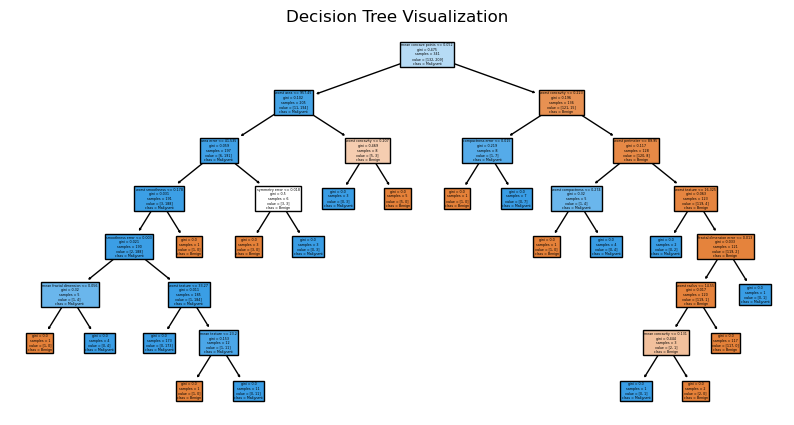

In [82]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plot_tree(dtc, filled=True, feature_names=df.columns, class_names=['Benign', 'Malignant'])
plt.title('Decision Tree Visualization')
plt.show()